# Lab | Random variable distributions

Refer to the files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv dataset.
Instructions

    


In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

from sklearn.preprocessing import PowerTransformer

In [2]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv') 

In [3]:
display(data.head())
display(data.columns)
display(len(data['Customer'].value_counts()))

for col in data.columns:
    print(col,": ", len(data[col].value_counts()))

data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])
data.info()
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

9134

Customer :  9134
State :  5
Customer Lifetime Value :  8041
Response :  2
Coverage :  3
Education :  5
Effective To Date :  59
EmploymentStatus :  5
Gender :  2
Income :  5694
Location Code :  3
Marital Status :  3
Monthly Premium Auto :  202
Months Since Last Claim :  36
Months Since Policy Inception :  100
Number of Open Complaints :  6
Number of Policies :  9
Policy Type :  3
Policy :  9
Renew Offer Type :  4
Sales Channel :  4
Total Claim Amount :  5106
Vehicle Class :  6
Vehicle Size :  3


In [4]:
display(data.columns)

data.rename(columns = {'Customer':'customer', 'State':'state', 'Customer Lifetime Value':'customer_lifetime_value', 'Response':'response', 'Coverage':'coverage',
       'Education':'education', 'Effective To Date':'effective_to_date', 'EmploymentStatus':'employment_status', 'Gender':'gender',
       'Income':'income', 'Location Code':'location_code', 'Marital Status':'marital_status', 'Monthly Premium Auto':'monthly_premium_auto',
       'Months Since Last Claim':'months_since_last_claim', 'Months Since Policy Inception':'months_since_policy_inception',
       'Number of Open Complaints':'number_of_open_complaints', 'Number of Policies':'number_of_policies', 'Policy Type':'policy_type',
       'Policy':'policy', 'Renew Offer Type':'renew_offer_type', 'Sales Channel':'sales_channel', 'Total Claim Amount':'total_claim_amount',
       'Vehicle Class':'vehicle_class', 'Vehicle Size':'vehicle_size'}, inplace = True) 


Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

# 1. Get the numerical variables from our dataset.

In [5]:
numerical = data.select_dtypes([np.number])
display(numerical)
display(numerical.info())

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 571.0 KB


None

# 2 .Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

'customer_lifetime_value'

'income'

'monthly_premium_auto'

'months_since_last_claim'

'months_since_policy_inception'

'number_of_open_complaints'

'number_of_policies'

'total_claim_amount'

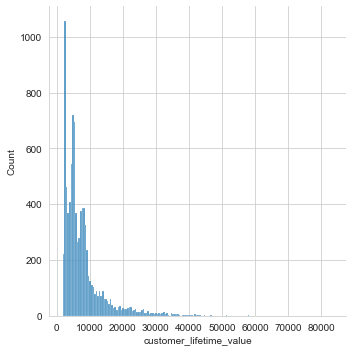

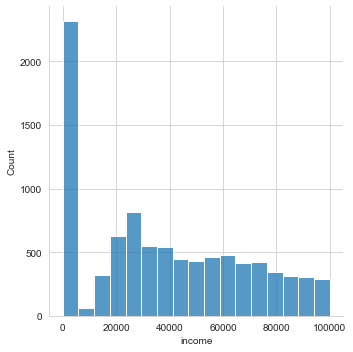

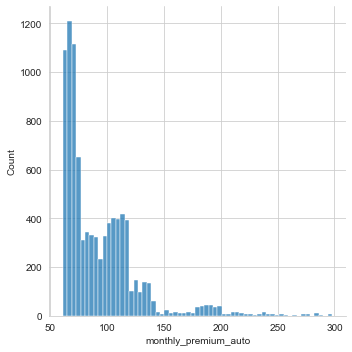

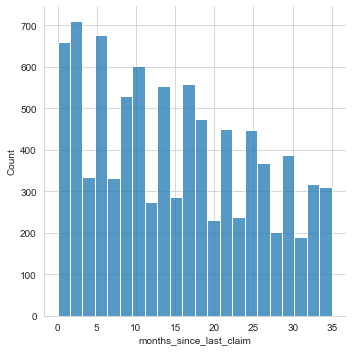

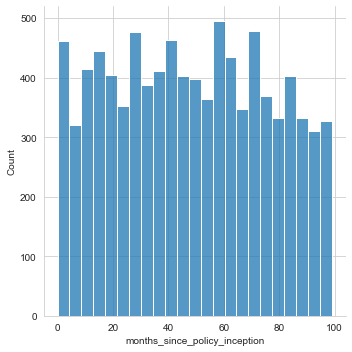

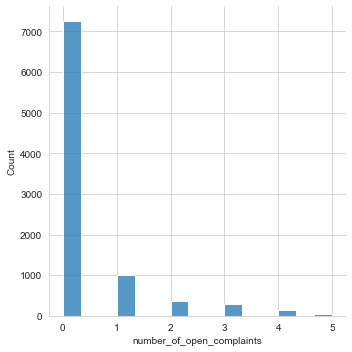

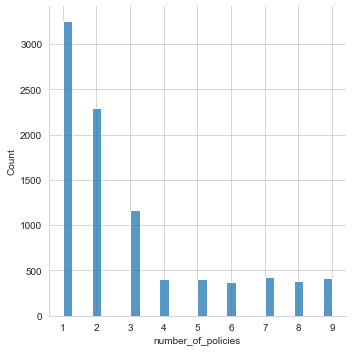

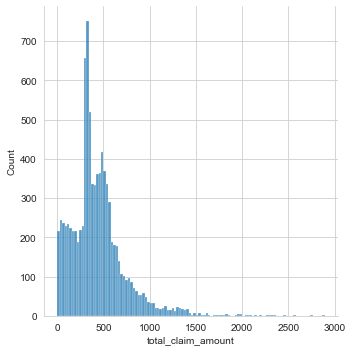

In [12]:
for col in numerical.columns:
    display(col)
    sns.displot(numerical[col])
    plt.show
"""
'customer_lifetime_value' => exponential

'income' => need to clean it?

'monthly_premium_auto' => Exponential

'months_since_last_claim'=> neither

'months_since_policy_inception'=> neither

'number_of_open_complaints'=> Exponential

'number_of_policies' => exponential

'total_claim_amount => exponential

Therefore, since they are all positive, a box cox transformation should have the best effect.

"""
    

# 3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [31]:
X = numerical.iloc[:,:-1]
y = numerical.iloc[:,-1]

display(type(X))
display(type(y))

pandas.core.frame.DataFrame

pandas.core.series.Series

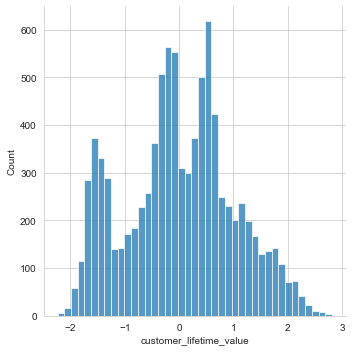

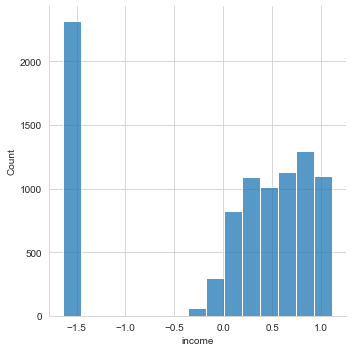

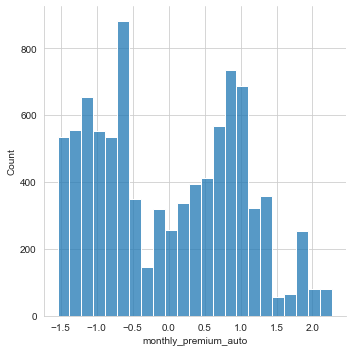

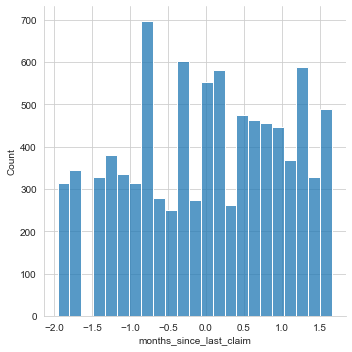

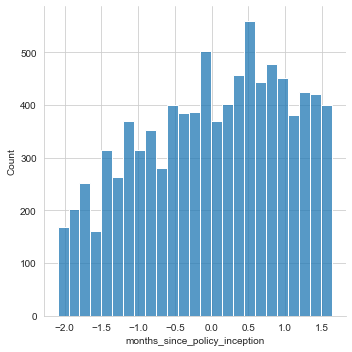

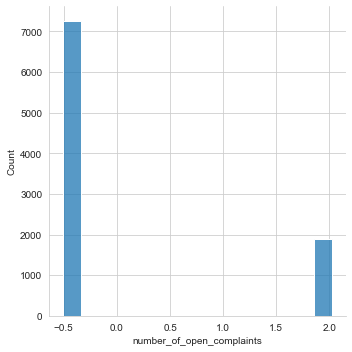

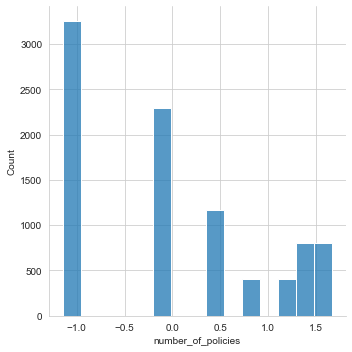

In [38]:
# Yeo Yonsson transformation (we seem to have negative values, so box cox was not working)

bc = PowerTransformer()
X_bc = pd.DataFrame(bc.fit_transform(X,y),columns=numerical.iloc[:,:-1].columns)

for col in X_bc.columns:
    sns.displot(X_bc[col])
    plt.show

